# Solar Data from Gridded Atmospheric Wind Integration National Dataset
---

**NREL**: National Renewable Energy Laboratory

**WIND**: Wind Integration National Dataset  
Information can be found at: https://www.nrel.gov/grid/wind-toolkit.html  
HSDS API: https://github.com/NREL/hsds-examples


The gridded atmospheric WIND toolkit is used for this analysis. It consists of a 50-TB subset containing 1-hour resolution data for 7 years on a uniform 2-km grid that covers the continental U.S., the Baja Peninsula, and parts of the Pacific and Atlantic oceans.

In [1]:
import westernintnet
import sys

sys.path.append("../")

import ga_wind
from matplotlib import pyplot
from helpers import to_reise

## 1. Solar Plants in Network

In [2]:
grid = westernintnet.WesternIntNet()
solar_plant = grid.genbus.groupby('type').get_group('solar')

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Load solar data
Load wind data
Load hydro data
Load demand data
Done loading


In [3]:
solar_plant.head()

,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,type,lat,lon,GenMWMax,GenMWMin,AreaNum,ZoneName,base_color
plantID,,,,,,,,,,,,,,,,,,,,,
51,10760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0.0,0.0000;,solar,45.584722,-122.405600,61.500001,13.060357,1,Washington,#feb308
57,10776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0.0,0.0000;,solar,48.448100,-122.433100,28.000000,3.770000,1,Washington,#feb308
58,10776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0.0,0.0000;,solar,48.448100,-122.433100,20.000000,6.145376,1,Washington,#feb308
61,10782,13.43,0.0,0.0,0.0,1.0162,27.32,1,13.43,13.43,...,0.0,0.0000;,solar,46.103887,-122.918429,18.333334,6.396563,1,Washington,#feb308
62,10782,14.65,0.0,0.0,0.0,1.0162,18.63,1,14.65,14.65,...,0.0,0.0000;,solar,46.103887,-122.918429,18.333334,7.370976,1,Washington,#feb308


In [4]:
print("There are %d solar plants in the Western grid." % len(solar_plant))

There are 391 solar plants in the Western grid.


## 2. Downloading Data

In [5]:
data = ga_wind.retrieve_data(solar_plant, start_date='2012-06-01', end_date='2012-10-01')

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [02:19<00:00,  1.08it/s]


In [6]:
data.tail(n=20)

,Pout,plantID,ts,tsID
1144828,5.120526,1913,2012-09-30 23:00:00,2928
1144829,7.511117,1986,2012-09-30 23:00:00,2928
1144830,4.462049,1987,2012-09-30 23:00:00,2928
1144831,3.718374,1988,2012-09-30 23:00:00,2928
1144832,2.788781,1989,2012-09-30 23:00:00,2928
1144833,19.669004,2009,2012-09-30 23:00:00,2928
1144834,3.014407,2010,2012-09-30 23:00:00,2928
1144835,11.530106,2011,2012-09-30 23:00:00,2928
1144836,3.813732,2122,2012-09-30 23:00:00,2928
1144837,3.206235,2123,2012-09-30 23:00:00,2928


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
data_oneplant = data[data.plantID == 2288]

Text(1,0.75,'Pout')

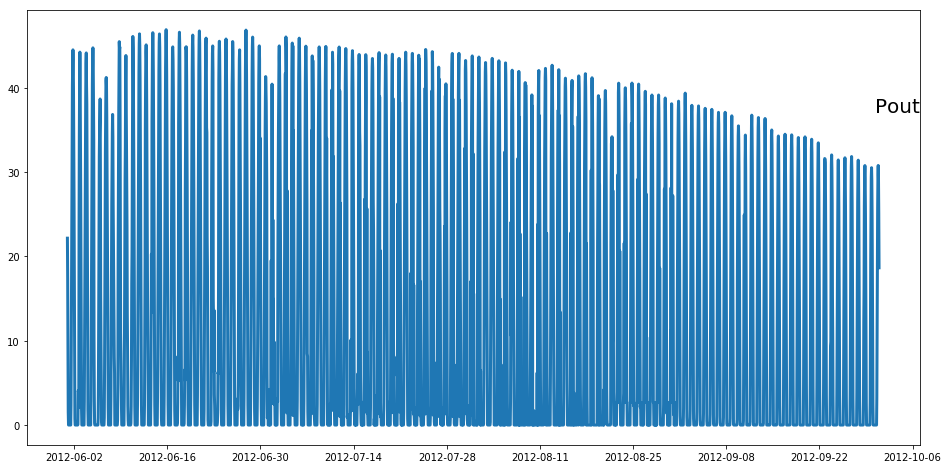

In [8]:
pyplot.figure(figsize=(16,8))
pyplot.plot(data_oneplant['ts'], data_oneplant['Pout'], lw=3)
pyplot.title('Pout', y=0.75, loc='right', fontsize=20)

Text(1,0.75,'Pout')

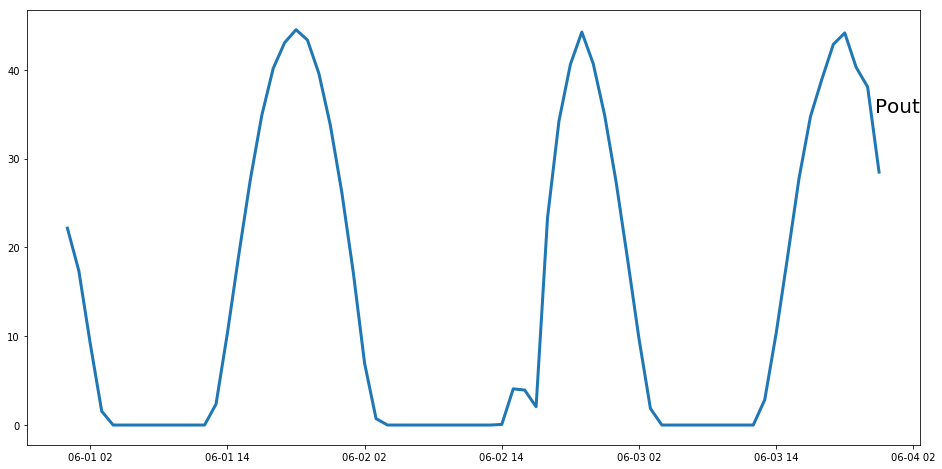

In [9]:
pyplot.figure(figsize=(16,8))
pyplot.plot(data_oneplant[:72]['ts'], data_oneplant[:72]['Pout'], lw=3)
pyplot.title('Pout', y=0.75, loc='right', fontsize=20)

## 4. Format Data
Data are formated for REISE.

In [10]:
data_reise = to_reise(data)

In [11]:
data_reise.tail()

,51,57,58,61,62,63,64,65,66,67,...,2124,2125,2126,2285,2286,2287,2288,2363,2364,2484
UTC,,,,,,,,,,,,,,,,,,,,,
2012-09-30 19:00:00,38.127285,16.218781,11.584844,11.136460,11.136460,11.136460,22.816429,33.703457,22.816429,22.816429,...,22.429636,26.167908,7.102718,29.610538,6.313548,6.313548,29.610538,12.383482,10.938743,8.262019
2012-09-30 20:00:00,40.934032,17.449984,12.464274,12.000964,12.000964,12.000964,24.532038,36.237682,24.532038,24.532038,...,21.844631,25.485401,6.917466,30.792864,6.565642,6.565642,30.792864,12.582325,11.114387,8.072070
2012-09-30 21:00:00,40.096199,17.104149,12.217249,11.804544,11.804544,11.804544,24.039419,35.510006,24.039419,24.039419,...,19.432034,22.670704,6.153477,29.231712,6.232774,6.232774,29.231712,11.736060,10.366853,7.233621
2012-09-30 22:00:00,35.716339,15.204731,10.860521,10.546341,10.546341,10.546341,21.371861,31.569603,21.371861,21.371861,...,15.393159,17.958685,4.874500,25.064646,5.344274,5.344274,25.064646,9.858101,8.707989,5.772963
2012-09-30 23:00:00,28.171490,11.920626,8.514732,8.351699,8.351699,8.351699,16.760452,24.757828,16.760452,16.760452,...,10.124953,11.812445,3.206235,18.656286,3.977886,3.977886,18.656286,7.135455,6.302985,3.878511
